# Binomial and Beta Distributions

This notebook explores the fundamentals of the binomial and beta distributions, and how they work together in Bayesian inference.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.5)

## The Binomial Distribution

The binomial distribution models the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success.

### Key Properties
- Discrete probability distribution
- Parameters: $n$ (number of trials) and $p$ (probability of success)
- Mean: $np$
- Variance: $np(1-p)$

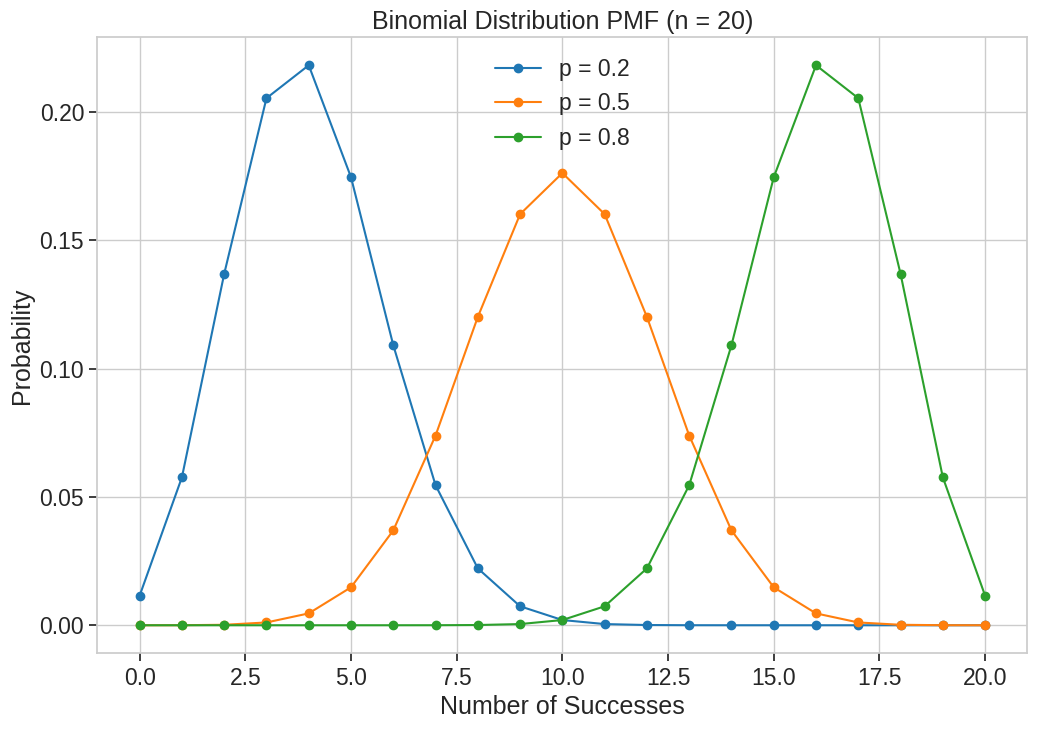

In [2]:
def plot_binomial(n, p_values):
    """Plot binomial PMF for different probability values."""
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.arange(0, n+1)
    
    for p in p_values:
        pmf = stats.binom.pmf(x, n, p)
        ax.plot(x, pmf, 'o-', label=f'p = {p}')
        
    ax.set_xlabel('Number of Successes')
    ax.set_ylabel('Probability')
    ax.set_title(f'Binomial Distribution PMF (n = {n})')
    ax.legend()
    plt.show()

# Example: 20 coin flips with different probabilities of heads
plot_binomial(n=20, p_values=[0.2, 0.5, 0.8])

## The Beta Distribution

The beta distribution is a continuous probability distribution defined on the interval [0, 1]. It's often used to model the probability of an event or the distribution of a random variable representing a probability.

### Key Properties
- Continuous probability distribution on [0, 1]
- Parameters: $\alpha$ and $\beta$ (shape parameters)
- Mean: $\frac{\alpha}{\alpha + \beta}$
- Mode: $\frac{\alpha - 1}{\alpha + \beta - 2}$ (for $\alpha, \beta > 1$)

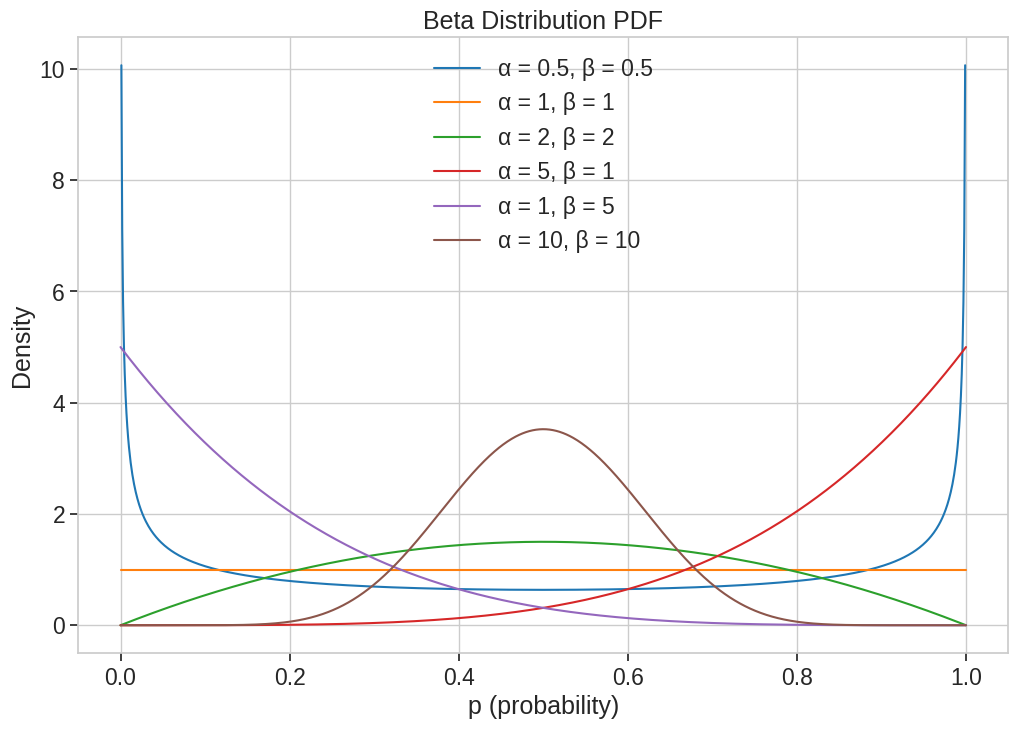

In [3]:
def plot_beta(alpha_beta_pairs):
    """Plot beta PDF for different alpha and beta values."""
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.linspace(0, 1, 1000)
    
    for alpha, beta in alpha_beta_pairs:
        pdf = stats.beta.pdf(x, alpha, beta)
        ax.plot(x, pdf, label=f'α = {alpha}, β = {beta}')
        
    ax.set_xlabel('p (probability)')
    ax.set_ylabel('Density')
    ax.set_title('Beta Distribution PDF')
    ax.legend()
    plt.show()

# Example: Different beta distributions
plot_beta([(0.5, 0.5), (1, 1), (2, 2), (5, 1), (1, 5), (10, 10)])

## Beta-Binomial Conjugacy

One of the powerful aspects of Bayesian statistics is the concept of conjugate priors. The beta distribution is the conjugate prior for the binomial distribution. This means that if we use a beta distribution as our prior belief about a probability $p$, and we observe binomial data, then our posterior belief about $p$ is also a beta distribution.

### Updating Rule
- Prior: $\text{Beta}(\alpha, \beta)$
- Likelihood: $\text{Binomial}(n, p)$ with $k$ successes observed
- Posterior: $\text{Beta}(\alpha + k, \beta + n - k)$

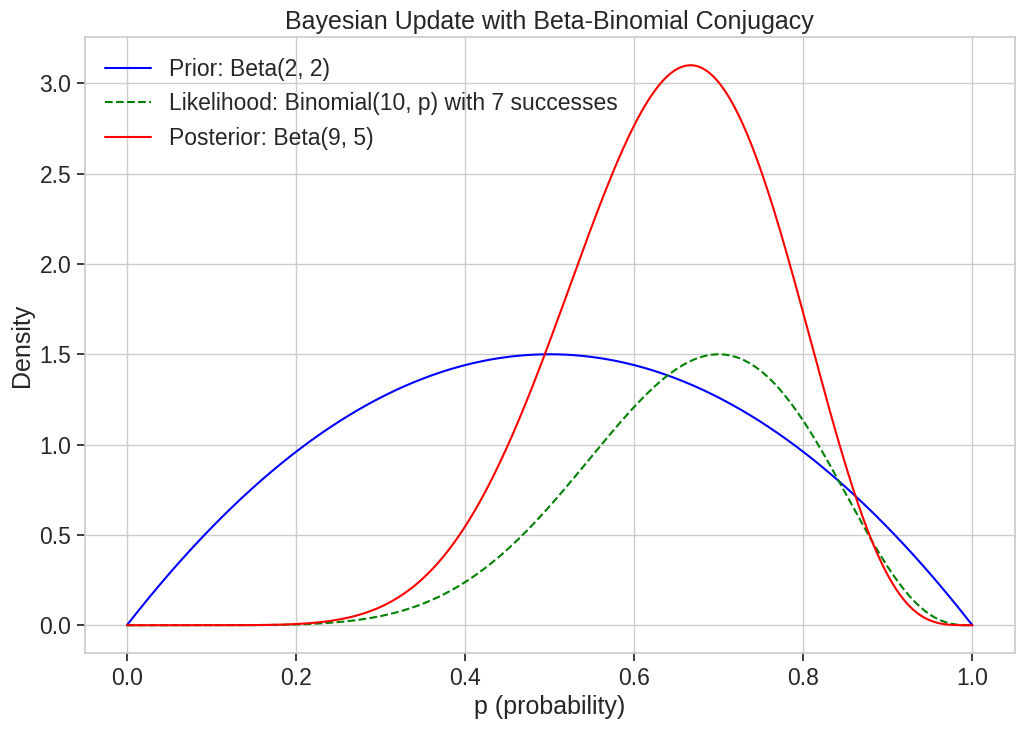

In [4]:
def plot_beta_binomial_update(prior_alpha, prior_beta, n, k):
    """Plot prior, likelihood, and posterior distributions."""
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.linspace(0, 1, 1000)
    
    # Prior
    prior = stats.beta.pdf(x, prior_alpha, prior_beta)
    ax.plot(x, prior, 'b-', label=f'Prior: Beta({prior_alpha}, {prior_beta})')
    
    # Likelihood (unnormalized)
    likelihood = x**k * (1-x)**(n-k)
    likelihood = likelihood / np.max(likelihood) * np.max(prior)  # Scale for visibility
    ax.plot(x, likelihood, 'g--', label=f'Likelihood: Binomial({n}, p) with {k} successes')
    
    # Posterior
    posterior = stats.beta.pdf(x, prior_alpha + k, prior_beta + n - k)
    ax.plot(x, posterior, 'r-', label=f'Posterior: Beta({prior_alpha + k}, {prior_beta + n - k})')
    
    ax.set_xlabel('p (probability)')
    ax.set_ylabel('Density')
    ax.set_title('Bayesian Update with Beta-Binomial Conjugacy')
    ax.legend()
    plt.show()

# Example: Updating a Beta(2, 2) prior after observing 7 successes in 10 trials
plot_beta_binomial_update(prior_alpha=2, prior_beta=2, n=10, k=7)

## Sequential Updating

One of the beautiful aspects of Bayesian inference is that we can update our beliefs sequentially as new data arrives. Let's demonstrate this with multiple updates of our belief about a coin's fairness.

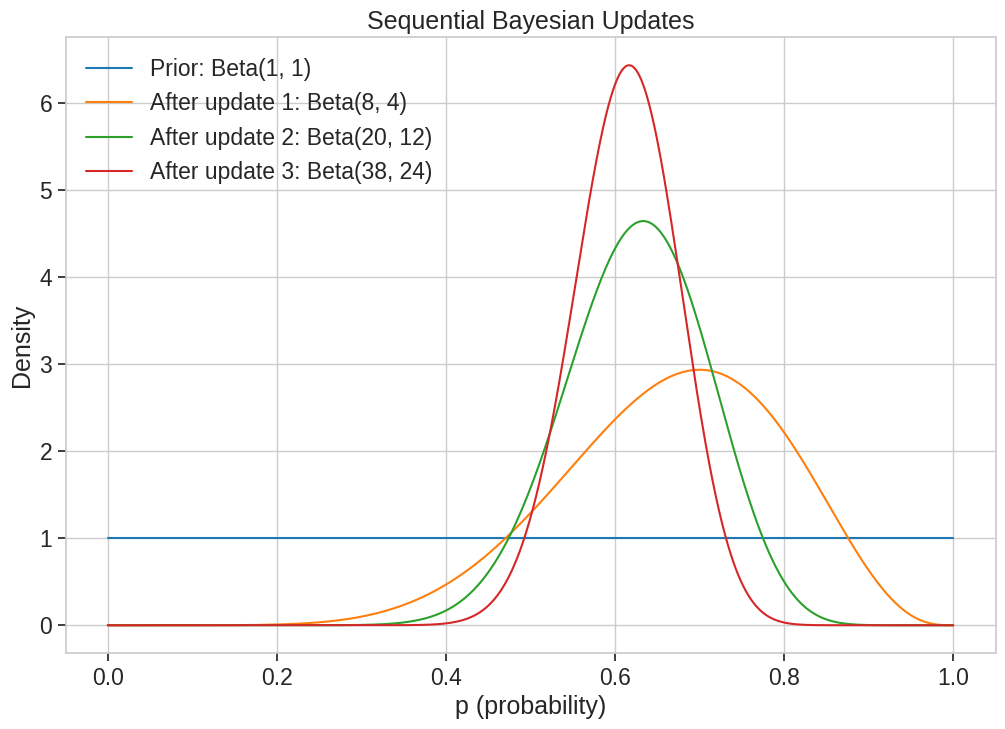

Final posterior: Beta(38, 24)
Posterior mean (estimated p): 0.6129


In [5]:
def sequential_beta_update(prior_alpha, prior_beta, data):
    """Perform sequential Bayesian updates and plot the results."""
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.linspace(0, 1, 1000)
    
    # Initial prior
    alpha, beta = prior_alpha, prior_beta
    prior = stats.beta.pdf(x, alpha, beta)
    ax.plot(x, prior, label=f'Prior: Beta({alpha}, {beta})')
    
    # Sequential updates
    for i, (n, k) in enumerate(data):
        alpha += k
        beta += n - k
        posterior = stats.beta.pdf(x, alpha, beta)
        ax.plot(x, posterior, label=f'After update {i+1}: Beta({alpha}, {beta})')
    
    ax.set_xlabel('p (probability)')
    ax.set_ylabel('Density')
    ax.set_title('Sequential Bayesian Updates')
    ax.legend()
    plt.show()
    
    return alpha, beta

# Example: Sequential updates for a coin flip experiment
# Each tuple is (number of trials, number of successes)
data = [(10, 7), (20, 12), (30, 18)]
final_alpha, final_beta = sequential_beta_update(1, 1, data)

print(f"Final posterior: Beta({final_alpha}, {final_beta})")
print(f"Posterior mean (estimated p): {final_alpha / (final_alpha + final_beta):.4f}")

## Bayesian Credible Intervals

A Bayesian credible interval provides a range of values for a parameter that has a specified probability of containing the true value, given the observed data. Let's calculate and visualize credible intervals for our posterior distribution.

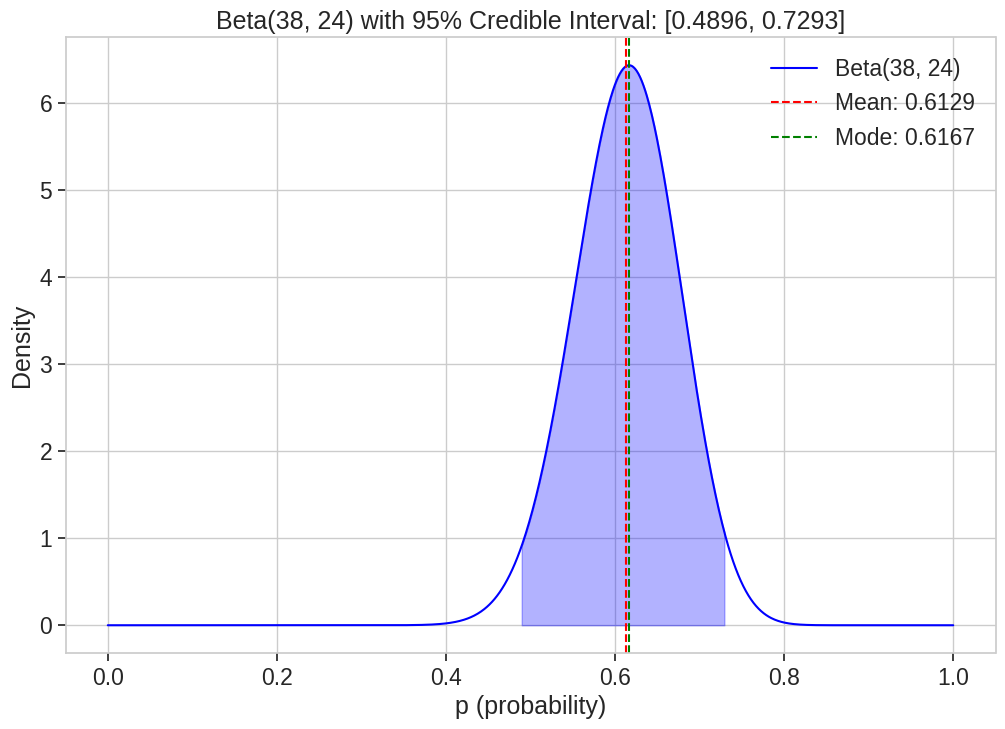

In [6]:
def plot_credible_interval(alpha, beta, ci=0.95):
    """Plot a beta distribution with credible interval."""
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.linspace(0, 1, 1000)
    
    # Beta distribution
    pdf = stats.beta.pdf(x, alpha, beta)
    ax.plot(x, pdf, 'b-', label=f'Beta({alpha}, {beta})')
    
    # Credible interval
    lower_bound = stats.beta.ppf((1-ci)/2, alpha, beta)
    upper_bound = stats.beta.ppf(1-(1-ci)/2, alpha, beta)
    
    # Shade the credible interval
    ci_x = np.linspace(lower_bound, upper_bound, 1000)
    ci_y = stats.beta.pdf(ci_x, alpha, beta)
    ax.fill_between(ci_x, ci_y, alpha=0.3, color='blue')
    
    # Mean and mode
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2) if alpha > 1 and beta > 1 else "N/A"
    
    ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.4f}')
    if isinstance(mode, float):
        ax.axvline(mode, color='g', linestyle='--', label=f'Mode: {mode:.4f}')
    
    ax.set_xlabel('p (probability)')
    ax.set_ylabel('Density')
    ax.set_title(f'Beta({alpha}, {beta}) with {ci*100:.0f}% Credible Interval: [{lower_bound:.4f}, {upper_bound:.4f}]')
    ax.legend()
    plt.show()

# Example: 95% credible interval for our final posterior
plot_credible_interval(final_alpha, final_beta)

## Bayesian A/B Testing

Let's apply what we've learned to a practical problem: comparing the conversion rates of two website designs (A/B testing).

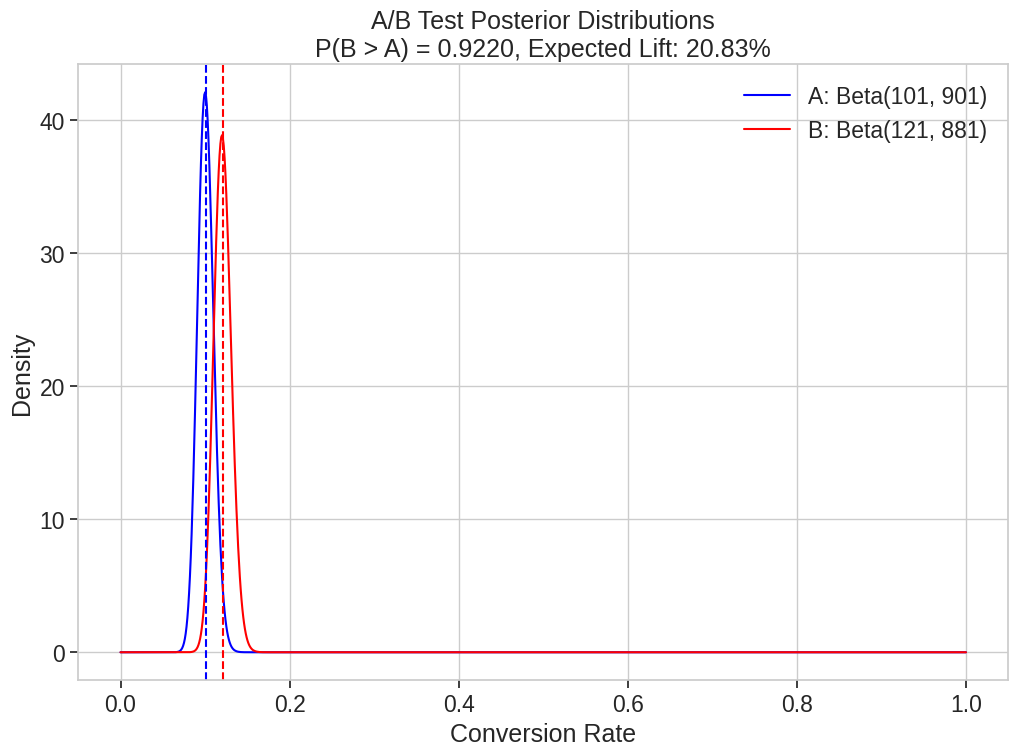

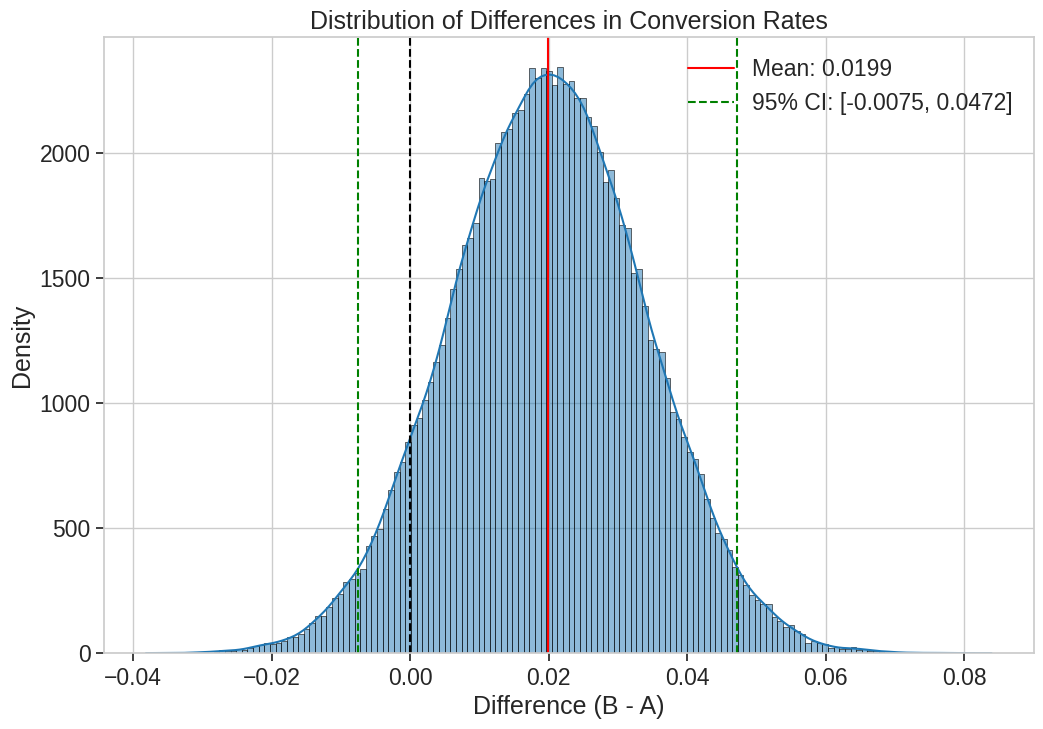

Probability that B is better than A: 0.9220
Expected lift: 20.83%
95% credible interval for the difference: (np.float64(-0.007473618379803857), np.float64(0.04717123716414054))


In [7]:
def bayesian_ab_test(a_trials, a_successes, b_trials, b_successes, prior_alpha=1, prior_beta=1, samples=100000):
    """Perform Bayesian A/B testing and calculate the probability that B is better than A."""
    # Posterior distributions
    a_posterior_alpha = prior_alpha + a_successes
    a_posterior_beta = prior_beta + a_trials - a_successes
    
    b_posterior_alpha = prior_alpha + b_successes
    b_posterior_beta = prior_beta + b_trials - b_successes
    
    # Generate samples from posterior distributions
    a_samples = np.random.beta(a_posterior_alpha, a_posterior_beta, samples)
    b_samples = np.random.beta(b_posterior_alpha, b_posterior_beta, samples)
    
    # Calculate probability that B is better than A
    prob_b_better = np.mean(b_samples > a_samples)
    
    # Calculate expected lift
    expected_lift = np.mean((b_samples - a_samples) / a_samples) * 100
    
    # Plot the posteriors
    fig, ax = plt.subplots(figsize=(12, 8))
    x = np.linspace(0, 1, 1000)
    
    a_pdf = stats.beta.pdf(x, a_posterior_alpha, a_posterior_beta)
    b_pdf = stats.beta.pdf(x, b_posterior_alpha, b_posterior_beta)
    
    ax.plot(x, a_pdf, 'b-', label=f'A: Beta({a_posterior_alpha}, {a_posterior_beta})')
    ax.plot(x, b_pdf, 'r-', label=f'B: Beta({b_posterior_alpha}, {b_posterior_beta})')
    
    # Mean values
    a_mean = a_posterior_alpha / (a_posterior_alpha + a_posterior_beta)
    b_mean = b_posterior_alpha / (b_posterior_alpha + b_posterior_beta)
    
    ax.axvline(a_mean, color='b', linestyle='--')
    ax.axvline(b_mean, color='r', linestyle='--')
    
    ax.set_xlabel('Conversion Rate')
    ax.set_ylabel('Density')
    ax.set_title(f'A/B Test Posterior Distributions\nP(B > A) = {prob_b_better:.4f}, Expected Lift: {expected_lift:.2f}%')
    ax.legend()
    plt.show()
    
    # Plot the distribution of differences
    diff = b_samples - a_samples
    
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(diff, kde=True, ax=ax)
    
    ax.axvline(0, color='k', linestyle='--')
    ax.axvline(np.mean(diff), color='r', linestyle='-', label=f'Mean: {np.mean(diff):.4f}')
    
    # 95% credible interval for the difference
    ci_lower = np.percentile(diff, 2.5)
    ci_upper = np.percentile(diff, 97.5)
    ax.axvline(ci_lower, color='g', linestyle='--', label=f'95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]')
    ax.axvline(ci_upper, color='g', linestyle='--')
    
    ax.set_xlabel('Difference (B - A)')
    ax.set_ylabel('Density')
    ax.set_title('Distribution of Differences in Conversion Rates')
    ax.legend()
    plt.show()
    
    return {
        'prob_b_better': prob_b_better,
        'expected_lift': expected_lift,
        'a_mean': a_mean,
        'b_mean': b_mean,
        'difference_ci': (ci_lower, ci_upper)
    }

# Example: A/B test with version A (100 conversions out of 1000 visitors)
# and version B (120 conversions out of 1000 visitors)
results = bayesian_ab_test(a_trials=1000, a_successes=100, b_trials=1000, b_successes=120)

print(f"Probability that B is better than A: {results['prob_b_better']:.4f}")
print(f"Expected lift: {results['expected_lift']:.2f}%")
print(f"95% credible interval for the difference: {results['difference_ci']}")